# * Insurance Cost Prediction Using Linear Regression Model *


### Research Question: Insruance cost predciton, which factor influnces the insurance cost the most?
#### Data retrieved from: https://www.kaggle.com/mirichoi0218/insurance



### 1. Importing Packages 

In [446]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Reading CSV file from dataset to the dataframe

In order to use the data cvs found, we will have to read it in pandas to use it for our work. Below shows our dataframe.

In [414]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [418]:
df.drop(['sex', 'region'], axis=1, inplace=True) 

In [420]:
pd.get_dummies(df.smoker)

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [421]:
pd.get_dummies(df.smoker, prefix='smoker').iloc[:, 1:]
pd.get_dummies(df.smoker, prefix='smoker').loc[:, 'smoker':]

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [422]:
df_final = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df_final

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0
5,31,25.740,0,3756.62160,0
6,46,33.440,1,8240.58960,0
7,37,27.740,3,7281.50560,0
8,37,29.830,2,6406.41070,0
9,60,25.840,0,28923.13692,0


### 5. Linear Regression Model

#### 5.1 Testing and Training Data
We will divide our data into testing and training data. This is so that our model can learn from the training set, and after it learns, it will test the learnings on the testing set. Below, we are printing our training dataset.

In [432]:
X = df_final.drop(['charges'], axis = 1)
Y = df_final.charges

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)
print(X_train,Y_train.shape)

      age     bmi  children  smoker_yes
621    37  34.100         4           1
194    18  34.430         0           0
240    23  36.670         2           1
1168   32  35.200         2           0
1192   58  32.395         1           0
1279   25  26.790         2           0
49     36  35.200         1           1
597    34  33.250         1           0
539    53  31.350         0           0
425    45  24.310         5           0
692    20  32.395         1           0
466    60  28.700         1           0
575    58  27.170         0           0
923    34  35.815         0           0
446    60  29.640         0           0
471    18  30.115         0           0
44     38  37.050         1           0
1092   23  32.700         3           0
969    39  34.320         5           0
1188   43  25.270         1           1
930    26  46.530         1           0
529    18  25.460         0           0
276    19  20.615         2           0
330    61  36.385         1           1


Below shows the number of columns and rows for our training data and testing data. 

In [433]:
print("Train Size", X_train.shape, "Test Size: ", X_test.shape, sep = "\n")

Train Size
(1070, 4)
Test Size: 
(268, 4)


By using sklearn's linear regression model, we were able to get the result of 0.7978. The result is most accurate when it is close to 1, so our results is not perfect, but gan be considered fairly good. 

In [434]:
lr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print(lr.score(X_test,Y_test))

0.7978274606303823


The plots below shows the visualization of our result. 

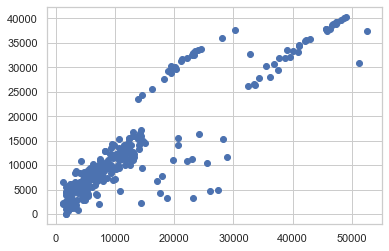

In [435]:
predictions = lr.predict(X_test)
plt.scatter(Y_test,predictions)

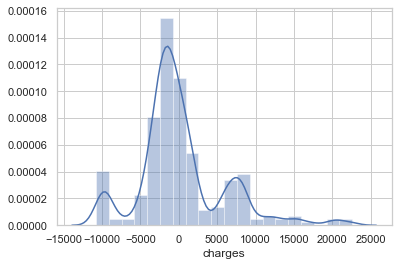

In [436]:
sns.distplot((Y_test-predictions),bins=20);

Below shows Ordinary Least Square (OLS) results using statsmodels.api. The R-squared is the variance explained in the data, and got 0.734 which is decent (73% variance of the target variable). You can also see details with differnt statistical factors. Below the reults, MAE (mean absolute error), MSE (mean squared error), and RMSE(root mean squared error) are also shown. 

In [437]:
X = X_train[['bmi', 'age', 'smoker_yes']]
y = Y_train
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     981.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.90e-306
Time:                        02:11:26   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.157e+04   1055.832    -10.960      0.0

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [442]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 3941.0693977631017
MSE: 32171708.57245572
RMSE: 5672.010981341249


Out residual shape seems like somewhat of a U shape, but not very clear. 

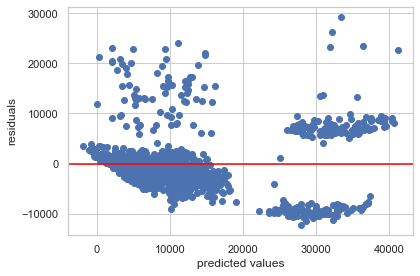

In [439]:
residuals = res.resid
Y_pred = res.predict(X)
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()